In [3]:
from pippi.soundbuffer import SoundBuffer
from pippi import dsp,fx
import numpy as np
import pandas as pd
import sounddevice as sd
import helpers as hp
import param_generation as pg
import _pickle as pickle

sr=44100

CPU times: user 602 ms, sys: 34.1 ms, total: 636 ms
Wall time: 1.51 s


<Figure size 576x360 with 0 Axes>

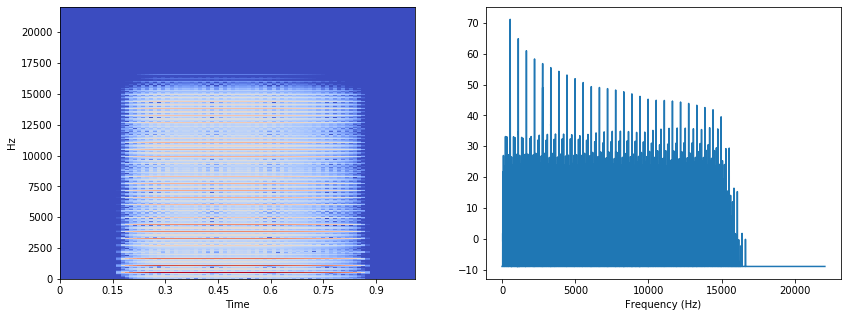

In [19]:
%%time
#generate 1 sound
import imp
imp.reload(pg)
imp.reload(hp)

out = dsp.buffer(length=1,channels=1)
params=[]
for i in range(1): 
    p=pg.RandomParams()
    s=pg.Synth(p)
    out.dub(s.buff,p.start)
    params.append(p)

out=fx.norm(out,1)    
sd.play(out,blocking=True)
hp.specShow(out)

In [20]:
%%time
#generate a lot of sounds
import imp
imp.reload(pg)
imp.reload(hp)

for j in range(1000):
    out = dsp.buffer(length=1,channels=1)
    params=[]
    for i in range(1): 
        p=pg.RandomParams()
        s=pg.Synth(p)
        out.dub(s.buff,p.start)
        params.append(p)
    out=fx.norm(out,1)    
    out.write("generations/sounds/%d.wav"%j)
    with open("generations/pickles/%d.pkl"%j, 'wb') as pfile:
        pickle.dump(params,pfile,-1)

CPU times: user 12.7 s, sys: 539 ms, total: 13.2 s
Wall time: 20.4 s


In [22]:
### test to see if pickle works
with open("generations/5_stack/pickles/1.pkl", 'rb') as pfile:
    params=pickle.load(pfile)
out = dsp.buffer(length=1,channels=1)
for p in params: 
    s=pg.Synth(p)
    out.dub(s.buff,p.start)
out=fx.norm(out,1)  
sd.play(out,blocking=True)

###actual sound
import librosa as lb
y,sr=lb.core.load("generations/5_stack/sounds/1.wav")
sd.play(y,samplerate=sr)